Using the Iris dataset with this experiment. The iris dataset contains information about the iris flower. 

The features in this dataset represent the length(1) and the width(2) of the sepal in cm as well as the length(3) and width(4) of the pedal in cm. 

The target variable is the type of iris flower. Either Iris Setosa, Iris Versicolour or Iris Virginica.

# KNN With Scikit Learn

In [1]:
import csv
import random
import math
import numpy as np
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
import pylab as pl
import matplotlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as accuracy
from operator import itemgetter

In [2]:
myIris = pd.read_csv("/Users/nikolai/Downloads/iris.data.txt", header=None)
dataIris = (myIris.iloc[:,0:2])
myIris.iloc[:,4] = myIris.iloc[:,4].replace({'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2})
targetIris = (myIris.iloc[:,4])

percent = .3

x_train, x_test, y_train, y_test = train_test_split(dataIris, targetIris, test_size = percent)


### Cross Validation:

The recommended number of neighbors is 5


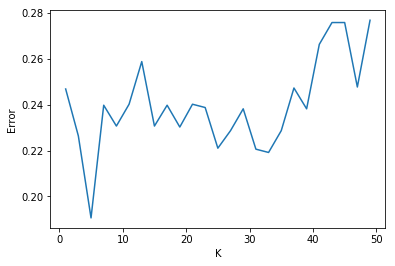

In [3]:
kList = list(range(1,50))
neigh = (list(filter(lambda x: x % 2 != 0, kList)))
scores = []
for k in neigh:
    predict = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(predict, x_train, y_train, cv=5, scoring='accuracy')
    scores.append(score.mean())

error = [1 - x for x in scores]
best_k = neigh[error.index(min(error))]
print ("The recommended number of neighbors is %d" % best_k)

plt.plot(neigh, error)
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [4]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

k = 1
[2 0 0 1 2 1 2 0 2 2 2 2 2 2 1 1 1 1 1 0 1 0 2 2 1 2 1 0 0 1 0 1 0 0 1 0 2
 0 1 2 0 2 2 2 2]
Percent Accuracy: 0.9555555555555556%
k = 3
[2 0 0 1 2 2 1 0 1 2 2 2 2 2 2 2 1 1 1 0 1 0 2 1 1 1 1 0 0 1 0 1 0 0 1 0 2
 0 1 2 0 2 2 1 2]
Percent Accuracy: 0.8222222222222222%


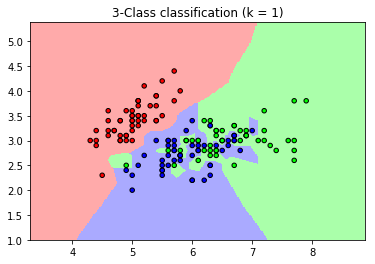

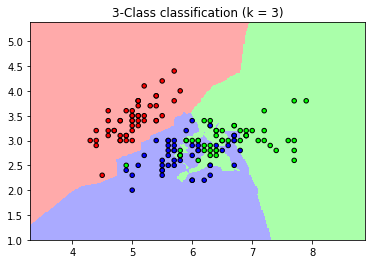

In [5]:
n_neighbors = best_k
h = .02

for k in range(1, n_neighbors,2):
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(dataIris, targetIris)
    predicted = clf.predict(x_test)
    print('k = ' + str(k))
    print (predicted)
    print ('Percent Accuracy: ' + (str(accuracy(y_test, predicted))) + '%')
    ###
    ###
    ###
    x_min, x_max = dataIris.iloc[:, 0].min() - 1, dataIris.iloc[:, 0].max() + 1
    y_min, y_max = dataIris.iloc[:, 1].min() - 1, dataIris.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #otherscore = clf.score(x_train, y_train)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    y_predicted = clf.predict(x_test)
    score = clf.score(x_test, y_test)
    
    plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_predicted, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (k))
    #print(y_predicted)
    
plt.show()

# KNN By Hand

In [6]:
def loadIris(trainSplit, testIris=[], trainIris=[]):
    with open("/Users/nikolai/Downloads/iris.data.txt", 'r') as csvfile:
        lines = csv.reader(csvfile)
        data = list(lines)
        for i in range (len(data)-1):
            for j in range(4):
                data[i][j] = float(data[i][j])
            if random.random() < trainSplit:
                trainIris.append(data[i])
            else:
                testIris.append(data[i])

In [7]:
def euDistance(x_neighbor, trainIris_point, length):
    eu_dist = 0.0
    for i in range (length):
        eu_dist += pow((x_neighbor[i] - trainIris_point[i]),2)
    return math.sqrt(eu_dist)

In [8]:
def neighbors(trainIris, x_neighbor, k):
    distance = []
    length = len(x_neighbor)-1
    for i in range(len(trainIris)):
        eu_dist = euDistance(x_neighbor, trainIris[i], length)
        distance.append((trainIris[i], eu_dist))
    distance.sort(key=itemgetter(1))
    neighbor = []
    for j in range(k):
        neighbor.append(distance[j][0])
    return neighbor 

In [9]:
def getMajority(neighbor):
    votes = {}
    for i in range(len(neighbor)): 
        re = neighbor[i][-1]
        if re in votes:
            votes[re] += 1
        else:
            votes[re] = 1
    finalVotes = sorted(votes.items(), key=itemgetter(1), reverse=True)
    return finalVotes[0][0]

In [10]:
def percentAccuracy(testIris, prediction):
    correct = 0
    for i in range(len(testIris)):
        if testIris[i][-1] in prediction[i]: 
            correct = correct + 1
    temp = (correct/float(len(testIris))*100) 
    answer = (temp)
    return(answer)

In [11]:
trainIris = []
numRight = 0
numWrong = 0
testIris = []
split = .700
loadIris(split, testIris, trainIris)
myLen = (len(trainIris))
myLen = (math.sqrt(myLen))
myLen = (int(round(myLen)))
if (myLen%2==0):
    myLen = myLen+1
prediction = []
k = myLen
print('K = ' + str(k))
for i in range (len(testIris)):
    neighbor = neighbors(trainIris, testIris[i], k)

    majority = getMajority(neighbor)
    prediction.append(majority)
    print('Prediction: ' + (majority) + ' || Answer: ' + (testIris[i][-1]))
    
accuracy = percentAccuracy(testIris, prediction)
print('Percent Accuracy: ' + (str(accuracy)) + '%')

K = 11
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-setosa || Answer: Iris-setosa
Prediction: Iris-versicolor || Answer: Iris-versicolor
Prediction: Iris-versicolor || Answer: Iris-versicolor
Prediction: Iris-versicolor || Answer: Iris-versicolor
Prediction: Iris-versicolor || Answer: Iris-versicolor
Prediction: Iris-vers